# Startup Team Size problem
Resource: [Link](https://support.spatialkey.com/spatialkey-sample-csv-data/)

In [139]:
# Starter code:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.linear_model import LinearRegression

# # read in the CSV
# df = pd.read_csv('funding_data.csv')
# df.head()

# Team sizes within seed / angel funded companies

In [106]:
df = pd.DataFrame(df)
count = 0
for key in df:
    print("Column", count,key)
    count += 1
    
df.head()

companies_with_early_funding = df.loc[(df["round"] == "seed") | (df["round"] == "angel")]
print("companies_with_early_funding:", len(companies_with_early_funding))

data = companies_with_early_funding[companies_with_early_funding['numEmps'] > 0]  
print("Number of all companies witth employees", len(number_of_comp_with_employees))

('Column', 0, 'permalink')
('Column', 1, 'company')
('Column', 2, 'numEmps')
('Column', 3, 'category')
('Column', 4, 'city')
('Column', 5, 'state')
('Column', 6, 'fundedDate')
('Column', 7, 'raisedAmt')
('Column', 8, 'raisedCurrency')
('Column', 9, 'round')
('companies_with_early_funding:', 263)
('Number of all companies witth employees', 539)


In [89]:
#1-4
gr1 = 0
#5-15
gr2 = 0
#16-100
gr3 = 0
#101-<
gr4 = 0

# print(data)
total = 0

for i in range(len(data)):
#     print(data.iloc[i, 2])
    if data.iloc[i, 2] > 0.00 and data.iloc[i, 2] <= 5.00:
        gr1 += 1
        total += 1
    elif data.iloc[i, 2] > 5.00 and data.iloc[i, 2] <= 15.00:
        gr2 += 1 
        total += 1
    elif data.iloc[i, 2] > 15.00 and data.iloc[i, 2] <= 100.00:
        gr3 += 1
        total += 1
    elif data.iloc[i, 2] > 100.00:
        gr4 += 1
        total += 1
print(gr1,gr2,gr3,gr4)

(62, 60, 28, 1)


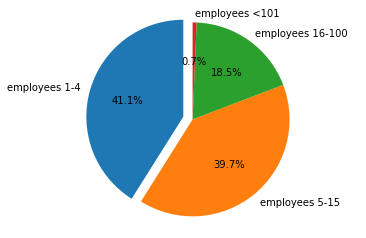

('Employees 1-4', 62)
('Employees 5-15', 60)
('Employees 16-100', 28)
('Employees 101-<', 1)
('Total', 151)


In [104]:

fig1, ax1 = plt.subplots()
explode = (0.1, 0, 0, 0)
ax1.pie([gr1,gr2,gr3,gr4], labels=['employees 1-4', 'employees 5-15', 'employees 16-100', 'employees <101'], autopct='%1.1f%%',
       startangle=90, explode=explode)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()
print('Employees 1-4', gr1)
print('Employees 5-15', gr2)
print('Employees 16-100', gr3)
print('Employees 101-<', gr4)
print("Total", total)

> Above, out of the Angel / Seed investemnets, what sizes were the teams

# Team sizes within round A investing


('companies_a_round:', 263)


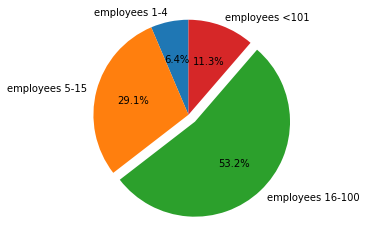

('Employees 1-4', 13)
('Employees 5-15', 59)
('Employees 16-100', 108)
('Employees 101-<', 23)
('Total', 203)


In [125]:
# Companies doing round A investment
companies_a_round = df.loc[(df["round"] == "a")]
print("companies_a_round:", len(companies_with_early_funding))

# Companies with enough data
round_a_not_null = companies_a_round[companies_a_round['numEmps'] > 0]  

# COUNT OF EMPLOYEE SIZE BUCKETS
#1-4 Emplyees
g1 = 0
#5-15 Emplyees
g2 = 0
#16-100 Emplyees
g3 = 0
#101-< Emplyees
g4 = 0

# Total Number of employees
t = 0

# Update bucket counts
for i in range(len(round_a_not_null)):
    if round_a_not_null.iloc[i, 2] > 0.00 and round_a_not_null.iloc[i, 2] <= 5.00:
        g1 += 1
        t += 1
    elif round_a_not_null.iloc[i, 2] > 5.00 and round_a_not_null.iloc[i, 2] <= 15.00:
        g2 += 1 
        t += 1
    elif round_a_not_null.iloc[i, 2] > 15.00 and round_a_not_null.iloc[i, 2] <= 100.00:
        g3 += 1
        t += 1
    elif round_a_not_null.iloc[i, 2] > 100.00:
        g4 += 1
        t += 1

# SETUP Pie Chart
fig2, ax2 = plt.subplots()
explode = (0, 0, 0.1, 0)
ax2.pie([g1,g2,g3,g4], labels=['employees 1-4', 'employees 5-15', 'employees 16-100', 'employees <101'], autopct='%1.1f%%', startangle=90, explode=explode)
ax2.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()
print('Employees 1-4', g1)
print('Employees 5-15', g2)
print('Employees 16-100', g3)
print('Employees 101-<', g4)
print("Total", t)

# Team size vs. Funding capital

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10de595d0>]],
      dtype=object)

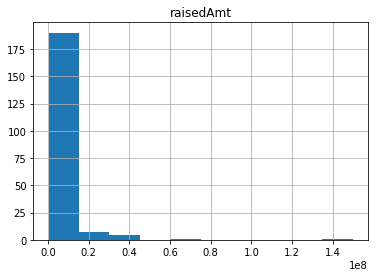

In [108]:
round_a_not_null.hist(column="raisedAmt")

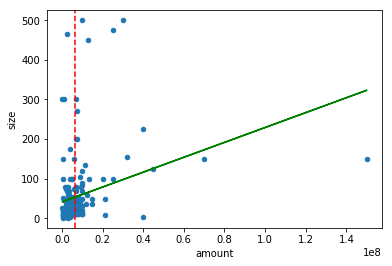

In [164]:
# Round A

# Companies with enough data
no_outlier = round_a_not_null[round_a_not_null['numEmps'] < 10000]  


team_sizes = []
amount_raised = []

# slopes = no_outlier.apply(lambda x: np.polyfit(no_outlier.index, x, 1)[0])



# Update bucket counts
for i in range(len(no_outlier)):
    amount_raised.append(no_outlier.iloc[i, 7])
    team_sizes.append(no_outlier.iloc[i, 2])

# print(team_sizes, amount_raised)
    
new_data = {"size":team_sizes, "amount": amount_raised}

new_df = pd.DataFrame(new_data, columns=["size", "amount"])

mean = new_df["amount"].mean()
new_df.plot(x="amount", y="size", kind='scatter').axvline(mean, color='r', linestyle='--')


x = np.array(amount_raised)
m, b = np.polyfit(x, team_sizes, 1)

plt.plot(x, m*x + b, color='g')

plt.show()

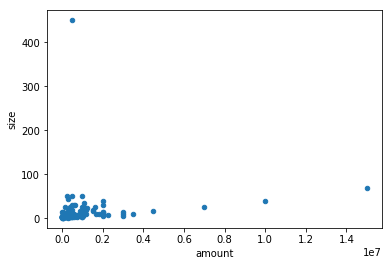

In [126]:
# Angel & Seed

team_sizes = []
amount_raised = []

# Update bucket counts
for i in range(len(data)):
    amount_raised.append(data.iloc[i, 7])
    team_sizes.append(data.iloc[i, 2])

# print(team_sizes, amount_raised)
    
new_data = {"size":team_sizes, "amount": amount_raised}

new_df = pd.DataFrame(new_data, columns=["size", "amount"])

new_df.plot(x="amount", y="size", kind='scatter')
plt.show()